# Statistical Thinking in Python 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set()

In [3]:
# Empirical cumulative distribution function (ECDF)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)      # Number of data points
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

## 1. Parameter estimation (모수 추정)

### Exponential distribution (지수 분포)

* 일정 구간에서 일어날 확률이 균등할 경우 - 균등 분포
* 평균에 가까울수록 일어날 확률이 커질 경우 - 정규 분포
* 시간이 지날수록 확률이 점점 작아지는 경우 - [지수 분포](http://math7.tistory.com/51)

In [4]:
# 미 메이저리그에서 no-hitter 나타나는 주기 (단위:game) - 지수 분포
# tau : mean interval time

nohitter_times = np.array([843, 1613, 1101, 215, 684, 814, 278, 324, 161, 219, 545, 715, 966, 624, 29, 450, 107, 20, 91, 1325, 124, 1468, 104, 1309, 429, 62, 1878, 1104, 123, 251, 93, 188, 983, 166, 96, 702, 23, 524, 26, 299, 59, 39, 12, 2, 308, 1114, 813, 887, 645, 2088, 42, 2090, 11, 886, 1665, 1084, 2900, 2432, 750, 4021, 1070, 1765, 1322, 26, 548, 1525, 77, 2181, 2752, 127, 2147, 211, 41, 1575, 151, 479, 697, 557, 2267, 542, 392, 73, 603, 233, 255, 528, 397, 1529, 1023, 1194, 462, 583, 37, 943, 996, 480, 1497, 717, 224, 219, 1531, 498, 44, 288, 267, 600, 52, 269, 1086, 386, 176, 2199, 216, 54, 675, 1243, 463, 650, 171, 327, 110, 774, 509, 8, 197, 136, 12, 1124, 64, 380, 811, 232, 192, 731, 715, 226, 605, 539, 1491, 323, 240, 179, 702, 156, 82, 1397, 354, 778, 603, 1001, 385, 986, 203, 149, 576, 445, 180, 1403, 252, 675, 1351, 2983, 1568, 45, 899, 3260, 1025, 31, 100, 2055, 4043, 79, 238, 3931, 2351, 595, 110, 215, 0, 563, 206, 660, 242, 577, 179, 157, 192, 192, 1848, 792, 1693, 55, 388, 225, 1134, 1172, 1555, 31, 1582, 1044, 378, 1687, 2915, 280, 765, 2819, 511, 1521, 745, 2491, 580, 2072, 6450, 578, 745, 1075, 1103, 1549, 1520, 138, 1202, 296, 277, 351, 391, 950, 459, 62, 1056, 1128, 139, 420, 87, 71, 814, 603, 1349, 162, 1027, 783, 326, 101, 876, 381, 905, 156, 419, 239, 119, 129, 467])

tau = np.mean(nohitter_times)  # parameter
tau

763.0358565737051

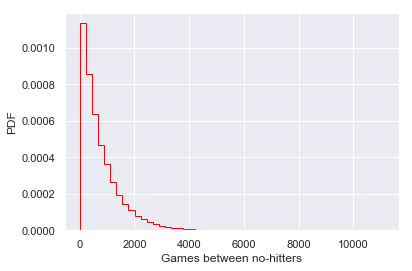

In [5]:
# tau를 통해 지수 분포 생성
inter_nohitter_time = np.random.exponential(tau, 100000)

# plot
_ = plt.hist(inter_nohitter_time, bins=50, density=True, histtype='step', edgecolor='red')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

Text(0, 0.5, 'CDF')

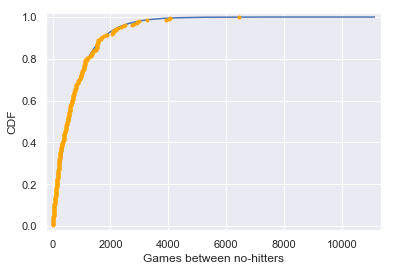

In [6]:
# ECDF from real data
x, y = ecdf(nohitter_times)

# CDF from theoretical samples
x_theor, y_theor = ecdf(inter_nohitter_time)

# plot - 실제 데이터와 이론상 데이터가 유사한 패턴을 보인다.
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none', color='orange')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

In [7]:
# tau 값이 1/2 또는 2배인 지수 분포와 함께 비교하면 tau 값이 optimal parameter 임을 알 수 있다.
# optimal parameter = parameter values that bring the model in closest agreement with the data.

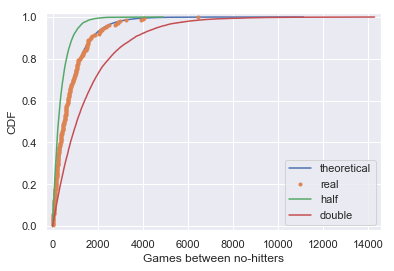

In [8]:
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

samples_half = np.random.exponential(tau/2, 10000)
samples_double = np.random.exponential(tau*2, 10000)

x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)
_ = plt.legend(('theoretical', 'real', 'half', 'double'), loc='lower right')
plt.show()

### Linear Regression

* correlation between female iliteracy and fertility (defined as the average number of children born per woman)
* 자녀 수가 많을 수록 문맹률이 높은가?

In [9]:
df = pd.read_csv('data/female_literacy_fertility.csv')
print(df.head())

fertility = df['fertility']
illiteracy = 100 - df['female literacy']

    Country  Continent  female literacy  fertility     population
0      Chine       ASI             90.5      1.769  1,324,655,000
1       Inde       ASI             50.8      2.682  1,139,964,932
2        USA       NAM             99.0      2.077    304,060,000
3  Indonésie       ASI             88.8      2.132    227,345,082
4     Brésil       LAT             90.2      1.827    191,971,506


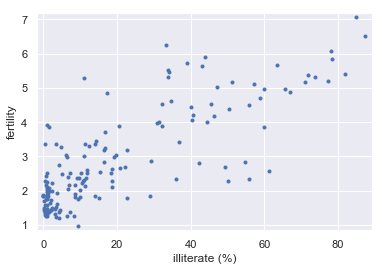

In [10]:
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
_ = plt.xlabel('illiterate (%)')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

In [11]:
np.corrcoef(illiteracy, fertility)

array([[1.       , 0.8041324],
       [0.8041324, 1.       ]])

In [12]:
# np.polyfit - 최소자승법을 이용한 선형회귀

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


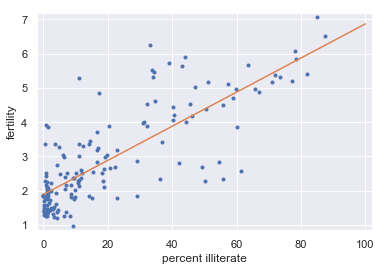

In [13]:
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')
plt.margins(0.02)

# Perform a linear regression using np.polyfit()
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot - regression line
x = np.array([0, 100])
y = a * x + b

_ = plt.plot(x, y)

## 2. Bootstrap confidence intervals

* Bootstrap : The use of random resampled data to perform statistical inference.

In [14]:
# NY 주에서 오바마에 대한 지지율로 50개의 bootstrap 생성하여 ECDF 비교

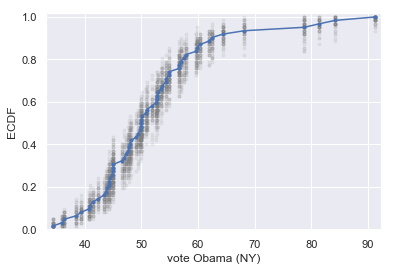

In [15]:
df = pd.read_csv('data/election2012.csv')
df_ny = df.loc[df['state'] == 'NY']
vote_ny = df_ny['Obama']

for _ in range(50):
    # Generate bootstrap sample
    bs_sample = np.random.choice(vote_ny, size=len(vote_ny))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1)
    
# real data
x, y = ecdf(vote_ny)
_ = plt.plot(x, y, marker='.')

plt.margins(0.02)
_ = plt.xlabel('vote Obama (NY)')
_ = plt.ylabel('ECDF')
plt.show()

### Bootstrap confidence intervals

In [16]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [17]:
def draw_bootstrap_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

Bootstrap estimate of the mean
* 오바마에 대한 NY주의 지지율 평균을 10,000개의 bootstrap replicates로 추정

Confidence interval of a statistic
* If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval.

standard error of mean : 1.3990943521471055
standard deviation of bootstraps : 1.3913788772541769


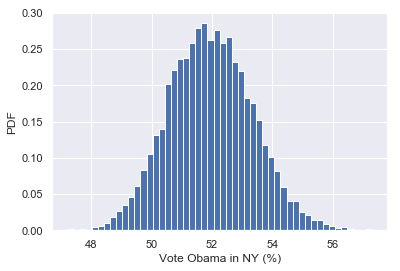

In [18]:
bs_replicates = draw_bootstrap_reps(vote_ny, np.mean, size=10000)

print('standard error of mean :', np.std(vote_ny) / np.sqrt(len(vote_ny)))
print('standard deviation of bootstraps :', np.std(bs_replicates))

# Plot a histogram of bootstrap replicates
_ = plt.hist(bs_replicates, bins=50, density=True, edgecolor='white')
_ = plt.xlabel('Vote Obama in NY (%)')
_ = plt.ylabel('PDF')
plt.show()

In [19]:
# 95% 신뢰구간
np.percentile(bs_replicates, [2.5, 97.5])

array([49.32092742, 54.75649194])

In [20]:
# no-hitter 에 대한 신뢰구간 추정

95% confidence interval = [662.47978088 870.87101594] games


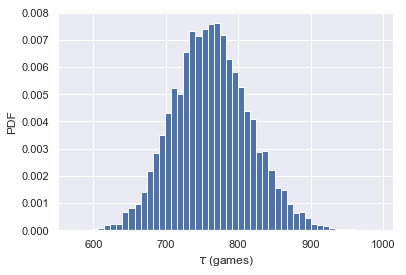

In [21]:
bs_replicates = draw_bootstrap_reps(nohitter_times, np.mean, size=10000)

conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_int, 'games')

_ = plt.hist(bs_replicates, bins=50, density=True, edgecolor='white')
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

### Nonparametric inference (비모수 추정)

* 분포에 대해 알려지지 않아 데이터에 대한 추정
* [비모수 추정과 bootstrap](http://blog.naver.com/leerider/100189402336)

### Pairs bootstrap for linear regression
* Resample data in pairs
* Compute slope and intercept from resampled data
* Each slope and intercept is a bootstrap replicate
* Compute confidence intervals from percentiles of bootstrap replicates

In [22]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample
    inds = np.arange(len(x))

    # Initialize replicates
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [23]:
# 출산율 대비 문맹률 데이터에 대한 추정

95% confidence interval = [0.04467295 0.05549804]


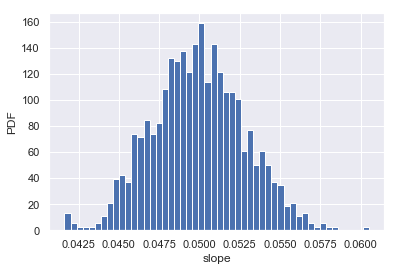

In [24]:
# estimate of the slope
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size=1000)

# 95% CI for slope
print('95% confidence interval =', np.percentile(bs_slope_reps, [2.5, 97.5]))

_ = plt.hist(bs_slope_reps, bins=50, density=True, edgecolor='white')
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

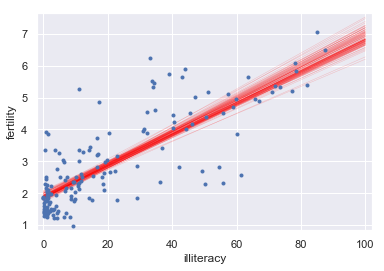

In [25]:
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i], linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

## 3. Hypothesis testing

* Assessment of how reasonable the observed data are assuming a hypothesis is True.

### permutation sampling (순열 샘플링)
* 두 변수가 동일한 확률을 갖는다는 가설을 증명
* 두 배열을 합쳐서 섞은 다음 각각 원래의 그 수만큼 랜덤하게 분할

In [26]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    
    data = np.concatenate((data1, data2))          # 두 데이터를 합치고
    permuted_data = np.random.permutation(data)    # 랜덤하게 섞어서 
    perm_sample_1 = permuted_data[:len(data1)]     # 원래의 수만큼 분할
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [27]:
# 지역 A와 B의 강수량 비교

rain_a = np.array([66.2,39.7,76.4,26.5,11.2,61.8,6.1,48.4,89.2,104.,34.,60.6,57.1,79.1,90.9,32.3,63.8,78.2,27.5,43.4,30.1,17.3,77.5,44.9,92.2,39.6,79.4,66.1,53.5,98.5,20.8,55.5,39.6,56.,65.1,14.8,13.2,88.1,8.4,32.1,19.6,40.4,2.2,77.5,105.4,77.2,38.,27.1,111.8,17.2,26.7,23.3,77.2,87.2,27.7,50.6,60.3,15.1,6.,29.4,39.3,56.3,80.4,85.3,68.4,72.5,13.3,28.4,14.7,37.4,49.5,57.2,85.9,82.1,31.8,126.6,30.7,41.4,33.9,13.5,99.1,70.2,91.8,61.3,13.7,54.9,62.5,24.2,69.4,83.1,44.,48.5,11.9,16.6,66.4,90.,43.2])
rain_b = np.array([83.6,30.9,62.2,37.0,41.0,160.2,18.2,122.4,71.3,44.2,49.1,37.6,114.5,28.8,82.5,71.9,50.7,67.7,112.,63.6,42.8,57.2,99.1,86.4,84.4,38.1,17.7,102.2,101.3,58.,82.,101.4,81.4,100.1,54.6,39.6,57.5,29.2,48.8,37.3,115.4,55.6,62.,95.,84.2,118.1,153.2,83.4,104.7,59.,46.4,50.,147.6,76.8,59.9,101.8,136.6,173.,92.5,37.,59.8,142.1,9.9,158.2,72.6,28.,112.9,119.3,199.2,50.7,44.,170.7,67.2,21.4,61.3,15.6,106.,116.2,42.3,38.5,132.5,40.8,147.5,93.9,71.4,87.3,163.7,141.4,62.6,84.9,28.8,121.1,28.6,32.4,112.,50.,126.8])
print(len(rain_a), np.mean(rain_a))
print(len(rain_b), np.mean(rain_b))

97 51.63298969072164
97 79.19896907216494


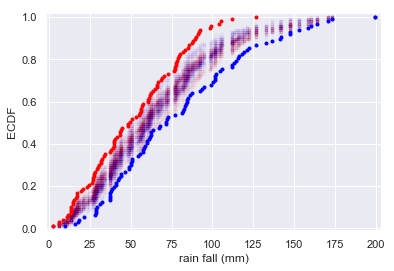

In [28]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_a, rain_b)

    # ECDFs of permutation sample
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', alpha=0.02)

# ECDFs from original data
x_1, y_1 = ecdf(rain_a)
x_2, y_2 = ecdf(rain_b)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')   # A 지역 강수량
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')  # B 지역 강수량

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('rain fall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

# 두 지역의 강수량은 동일한 분포를 갖지 않음을 알 수 있다.

#### 검정 통계 (Test statistics) & p-value

In [29]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [30]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [31]:
# South American horned frogs - 개구리 A와 B 공격력 비교

df = pd.read_csv('data/frog_tongue.csv')
df.head()

,date,ID,trial number,impact force,impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,A,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,A,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,A,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,A,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,A,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


In [32]:
df['impact_force'] = df['impact force'] / 1000
df[['ID', 'impact_force']].head()

,ID,impact_force
0,A,1.205
1,A,2.527
2,A,1.745
3,A,1.556
4,A,0.493


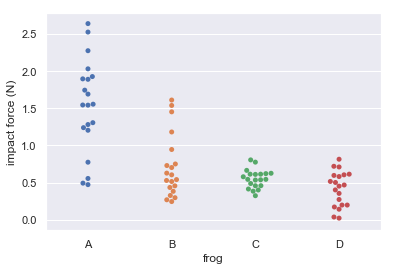

In [33]:
_ = sns.swarmplot(x='ID', y='impact_force', data=df)
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

In [34]:
force_a = df['impact_force'][df['ID'] == 'B']
force_b = df['impact_force'][df['ID'] == 'D']

In [35]:
# Permutation test

# 개구리 A의 B의 평균 공격력 차이는 0.288 N. 
# 개구리가 동일한 힘으로 공격 할 수 있고, 관찰된 차이가 우연히 발생할 수 있다. 
# 두 개구리에 대한 공격력 분배가 동일하다는 가설 하에서 평균 타격력의 차이가 최소 0.288 N이 될 확률을 계산.

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment
empirical_diff_means = diff_of_means(force_a, force_b)
print('empirical_diff_means : %.3f' % empirical_diff_means)

# Draw 10,000 permutation replicates
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size=10000)

# Compute p-value
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
print('p-value =', p)

empirical_diff_means : 0.288
p-value = 0.0042


In [36]:
# A one-sample bootstrap hypothesis test

# 개구리 C : 데이터가 없지만 평균은 0.55. 개구리 B와 같은 분포에서 나온 것.
# 가정 : 개구리 B와 C의 평균 공격력은 같다

# translated impact forces --> 개구리 C
translated_force_b = force_b - np.mean(force_b) + 0.55  # 평균이 0.55가 되도록 데이터 변환

# Take bootstrap replicates of Frog B's translated impact forces
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000
print('p = ', p)

p =  0.0057


In [37]:
# two-sample bootstrap hypothesis test 
# 가정 : 개구리 A와 B는 동일한 평균 공격력을 가지고 있다.

mean_force = np.mean(np.concatenate([force_a, force_b]))

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0041


### A/B Test

* A그룹은 프로모션 상품을 153명이 구매, 91명은 비구매. B그룹은 136명 구매, 35명 비구매.
* A와 B 그룹의 특성이 상품 구매에 영향을 미쳤는가?

In [38]:
groupA = np.array([True] * 153 + [False] * 91)
groupB = np.array([True] * 136 + [False] * 35)

# A 그룹에서 상품을 구매한 비율
def frac_yes(groupA, groupB):
    frac = np.sum(groupA) / len(groupA)
    return frac

# permutation samples
perm_replicates = draw_perm_reps(groupA, groupB, frac_yes, 10000)

frac = np.sum(groupA) / len(groupA)
p = np.sum(perm_replicates <= frac) / len(perm_replicates)
print('p-value =', p)

# p-value가 0.05보다 작기 때문에 그룹이 영향을 미치지 않는다는 가설은 기각된다.

p-value = 0.0003


## 5. Case study 

* 1975년과 2012년에 측정한 finch 새의 부리 깊이와 길이(mm)

In [39]:
df1975 = pd.read_csv('data/finch_beaks_1975.csv')
df2012 = pd.read_csv('data/finch_beaks_2012.csv')

df1975 = df1975[df1975.species == 'scandens']
df1975['year'] = '1975'
df2012 = df2012[df2012.species == 'scandens']
df2012['year'] = '2012'

print(df1975.shape)
print(df2012.shape)

print(df2012.head())

(87, 5)
(127, 5)
      band   species  beak_length  beak_depth  year
121  19026  scandens         14.3         9.4  2012
122  19028  scandens         12.5         8.9  2012
123  19029  scandens         13.7         9.5  2012
124  19094  scandens         13.8        11.0  2012
125  19122  scandens         12.0         8.7  2012


In [40]:
df_finch = df1975.append(df2012)
df_finch.shape

(214, 5)

In [41]:
df_finch.head()

,band,species,beak_length,beak_depth,year
316,302,scandens,13.9,8.4,1975
317,304,scandens,14.0,8.8,1975
318,306,scandens,12.9,8.4,1975
319,310,scandens,13.5,8.0,1975
320,317,scandens,12.9,7.9,1975


## bee swarm plot

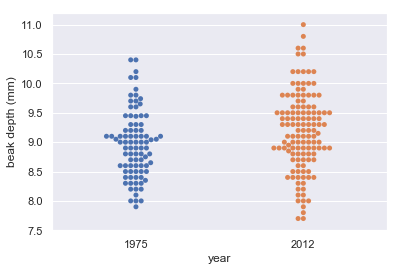

In [42]:
_ = sns.swarmplot(data=df_finch, x='year', y='beak_depth')
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')
plt.show()

# 두 데이터가 분명하게 구분된다고 보기는 어렵다.
# 2012년 데이터의 평균이 약간 높고, 분산이 더 커 보인다.

### ECDFs of beak depths

In [43]:
bl_1975 = np.array(df1975['beak_length'])
bd_1975 = np.array(df1975['beak_depth'])

bl_2012 = np.array(df2012['beak_length'])
bd_2012 = np.array(df2012['beak_depth'])

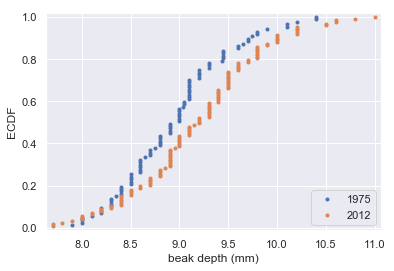

In [44]:
# ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')
plt.show()

# ECDF 에서 차이가 좀 더 분명하게 드러난다.

### Parameter estimate

In [45]:
# difference of the sample means
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# bootstrap replicates of means
bs_replicates_1975 = draw_bootstrap_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bootstrap_reps(bd_2012, np.mean, 10000)

# difference of means
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# 95% confidence interval
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06158041 0.39330263] mm


### Hypothesis test : 2012년에 부리가 더 깊어졌는가?

* finch 새의 부리가 더 깊어진 것이 단지 우연의 결과가 아님을 보기 위해 permutation test 수행.

In [46]:
# Shift the samples
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bootstrap_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bootstrap_reps(bd_2012_shifted, np.mean, 10000)
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)
print('p =', p)

p = 0.0047


In [47]:
# 통계적으로 유의미한 차이가 있음을 알 수 있다.
# 그러나 평균의 차이가 겨우 0.2 mm 이므로 큰 차이가 있다고 하기는 어렵다. 

### relation of length & depth

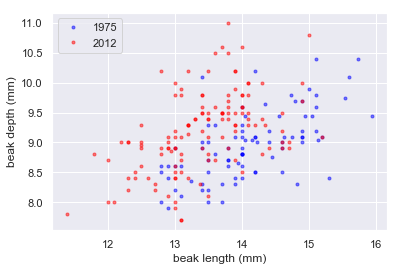

In [48]:
_ = plt.plot(bl_1975, bd_1975, marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bl_2012, bd_2012, marker='.', linestyle='none', color='red', alpha=0.5)
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')
plt.show()

In [49]:
# 빨간점(2012)을 보면 부리는 더 깊어지기는 했지만 길이가 늘어나지는 않았다. 오히려 조금 짧아진 것으로 보인다.

### Linear regressions

In [50]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample
    inds = np.arange(len(x))
    
    # Initialize replicates
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [51]:
print(type(bl_1975))
# linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975, 'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975, 'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012, 'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012, 'conf int =', intercept_conf_int_2012)

<class 'numpy.ndarray'>
1975: slope = 0.4652051691605937 conf int = [0.33662549 0.59405705]
1975: intercept = 2.3908752365842263 conf int = [0.58995102 4.18429643]
2012: slope = 0.462630358835313 conf int = [0.33140016 0.59751857]
2012: intercept = 2.9772474982360198 conf int = [1.18514551 4.67472401]


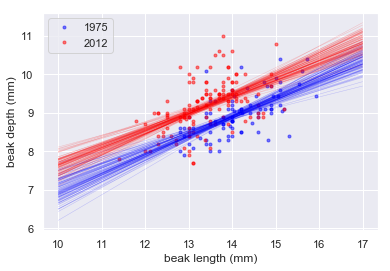

In [52]:
_ = plt.plot(bl_1975, bd_1975, marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bl_2012, bd_2012, marker='.', linestyle='none', color='red', alpha=0.5)
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i], linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i], linewidth=0.5, alpha=0.2, color='red')

plt.show()

In [53]:
# slope는 같은데, 깊이(intercept)가 약 0.5 mm 증가했다.

In [54]:
# 부리의 길이/깊이 비율
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

bs_replicates_1975 = draw_bootstrap_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bootstrap_reps(ratio_2012, np.mean, size=10000)

# 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

print('1975: mean ratio =', mean_ratio_1975, 'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012, 'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55742335 1.60080465]
2012: mean ratio = 1.4658342276847767 conf int = [1.44485567 1.48870073]


In [55]:
# 평균 부리의 길이/깊이 비율은 약 0.1mm 또는 7 % 감소했다. 99% 신뢰구간이 겹치지 않기 때문에 실제 변화이다.